In [ ]:
import pandas as pd
!pip install pycaret
from pycaret.classification import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 88.3 MB/s eta 0

In [ ]:
from google.colab import files
import io
uploaded = files.upload()
data_file = pd.read_csv(io.BytesIO(uploaded["SDSS_DR18.csv"]))
data_file.head()

Saving SDSS_DR18.csv to SDSS_DR18.csv


,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,...,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,...,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,...,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,...,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,...,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


In [ ]:
s = setup(data=data_file, target='class', session_id=123)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Multiclass
3,Target mapping,"GALAXY: 0, QSO: 1, STAR: 2"
4,Original data shape,"(100000, 43)"
5,Transformed data shape,"(100000, 43)"
6,Transformed train set shape,"(70000, 43)"
7,Transformed test set shape,"(30000, 43)"
8,Numeric features,42
9,Preprocess,True


In [7]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9937,0.9993,0.9937,0.9937,0.9937,0.9891,0.9891,42.9520
lightgbm,Light Gradient Boosting Machine,0.9934,0.9993,0.9934,0.9934,0.9934,0.9886,0.9886,23.8230
rf,Random Forest Classifier,0.9909,0.9985,0.9909,0.9909,0.9909,0.9842,0.9842,0.9580
gbc,Gradient Boosting Classifier,0.9908,0.9987,0.9908,0.9908,0.9908,0.9840,0.9840,0.6410
et,Extra Trees Classifier,0.9881,0.9970,0.9881,0.9880,0.9880,0.9792,0.9793,0.9700
dt,Decision Tree Classifier,0.9870,0.9895,0.9870,0.9870,0.9870,0.9774,0.9774,0.4120
lda,Linear Discriminant Analysis,0.9785,0.9934,0.9785,0.9787,0.9782,0.9625,0.9627,0.3850
ridge,Ridge Classifier,0.9766,0.0000,0.9766,0.9768,0.9762,0.9591,0.9594,0.3110
ada,Ada Boost Classifier,0.9015,0.9684,0.9015,0.8896,0.8800,0.8190,0.8321,0.7830
knn,K Neighbors Classifier,0.7672,0.8184,0.7672,0.7329,0.7393,0.5671,0.5827,6.3710


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

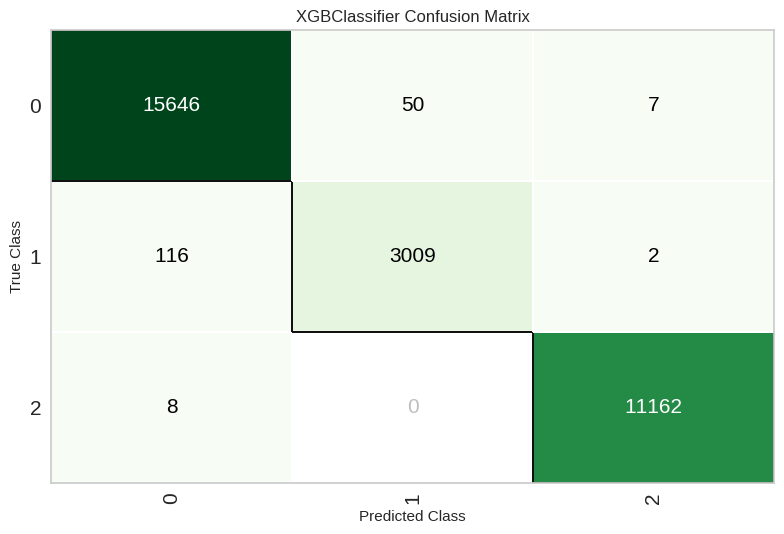

In [8]:
plot_model(best_model, plot = 'confusion_matrix')

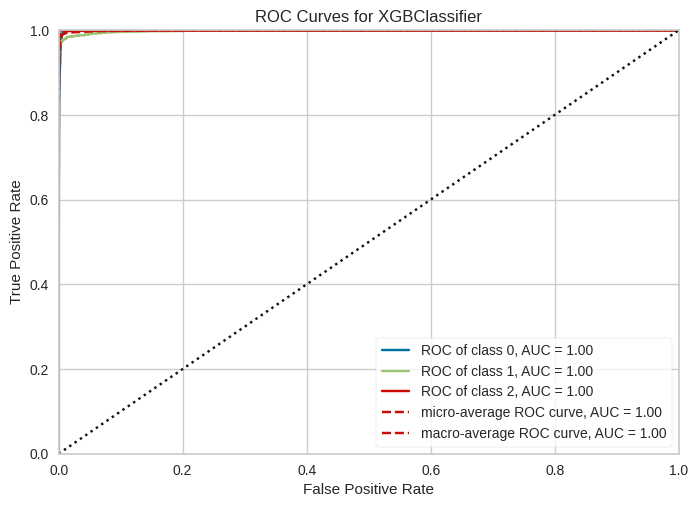

In [9]:
plot_model(best_model, plot = 'auc')


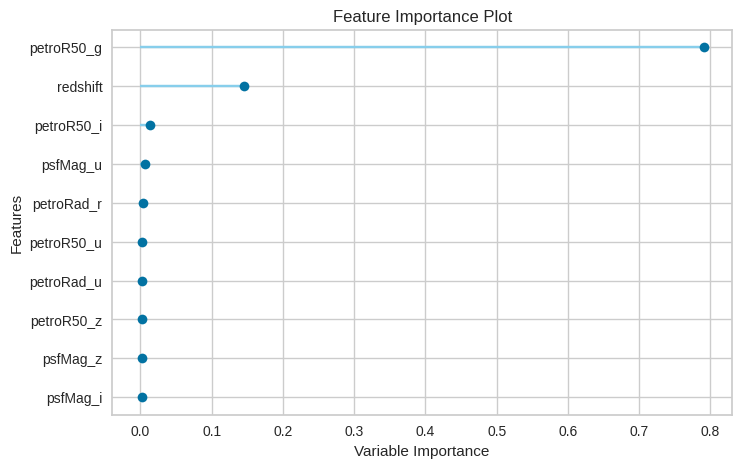

In [10]:
plot_model(best_model, plot = 'feature')

In [11]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [12]:
holdout_pred = predict_model(best_model)
holdout_pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9939,0.9994,0.9939,0.9939,0.9939,0.9894,0.9894


,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class,prediction_label,prediction_score
81798,1.240000e+18,9.480000e+17,182.277573,5.363067,19.352030,17.704439,16.930460,16.539221,16.249189,2126,...,17.508551,0.738042,0.783289,0.733015,0.718907,0.782704,0.077263,0,GALAXY,0.9999
98566,1.240000e+18,6.500000e+17,160.033386,4.693320,18.451080,16.988920,15.942070,15.447150,15.177240,2125,...,16.631910,0.602348,0.561410,0.581498,0.591297,0.614933,0.083418,0,GALAXY,0.9991
3303,1.240000e+18,3.690000e+17,176.320419,-2.903764,18.097191,16.968060,16.575211,16.427570,16.389759,1140,...,16.397881,0.332366,0.937607,0.647026,0.508318,0.767956,-0.000058,2,STAR,1.0000
37652,1.240000e+18,5.970000e+17,208.923569,2.871107,16.956659,16.058310,15.727140,15.573440,15.444890,1462,...,17.283760,0.836213,0.924531,0.878019,0.935959,0.917567,0.023751,0,GALAXY,0.9992
83595,1.240000e+18,6.350000e+17,132.012802,3.087113,19.499201,18.324680,17.837311,17.655130,17.522310,2125,...,17.533810,0.052212,0.652754,0.581767,0.690236,0.784239,0.000609,2,STAR,1.0000


In [14]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9941,0.9989,0.9941,0.9941,0.9941,0.9898,0.9898
1,0.9956,0.9996,0.9956,0.9956,0.9956,0.9923,0.9923
2,0.9934,0.9994,0.9934,0.9934,0.9934,0.9886,0.9886
3,0.9943,0.9995,0.9943,0.9943,0.9943,0.9901,0.9901
4,0.9939,0.9991,0.9939,0.9938,0.9938,0.9893,0.9893
5,0.9916,0.9991,0.9916,0.9915,0.9915,0.9854,0.9854
6,0.9941,0.9994,0.9941,0.9941,0.9941,0.9898,0.9898
7,0.9933,0.9988,0.9933,0.9933,0.9933,0.9883,0.9883
8,0.9931,0.9995,0.9931,0.9931,0.9931,0.9881,0.9881


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
save_model(best_model, 'best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['objid', 'specobjid', 'ra', 'dec',
                                              'u', 'g', 'r', 'i', 'z', 'run',
                                              'rerun', 'camcol', 'field',
                                              'plate', 'mjd', 'fiberid',
                                              'petroRad_u', 'petroRad_...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta